GROUP 1:

GERARD IRAO <br>
FAUSTINE AGUINALDO <br>
LUIS TABIAN <br>
KENT BALUYOT <br>


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 

## LOAD THE DATASET

In [3]:
df  = pd.read_csv("../../../../data/big data\Facebook_Data.csv")
df

Unnamed: 0  Meredith Stransky    Brittney Mazzella    Yi Cook    \
0    Meredith Stransky                      0                    0          0   
1    Brittney Mazzella                      0                    0          0   
2              Yi Cook                      0                    0          0   
3       Porter Devries                      0                    0          0   
4     Suzanne Syverson                      0                    0          0   
..                   ...                  ...                  ...        ...   
995               Danish                    0                    0          0   
996              Matloob                    0                    0          0   
997       Sameed Shahzad                    0                    0          0   
998               Frazer                    0                    1          0   
999             Mubashir                    0                    0          0   

     Porter Devries    Suzanne Syverson    Ladawn Creason    \
0                   0                   0                 0   
1                   0                   0                 0   
2                   0                   0                 0   
3                   0                   0                 0   
4                   0                   0                 0   
..                ...                 ...               ...   
995                 0                   0                 0   
996                 0                   0                 0   
997                 0                   0                 0   
998                 0                   0                 0   
999                 0                   0                 0   

     Mikel Lamberson    Lakendra Lasiter    Kate Shiver    ...  Tehmina  \
0                    0                   0              0  ...        0   
1                    0                   0              0  ...        0   
2                    0                   1              0  ...        1   
3                    1                   0              0  ...        0   
4                    0                   0              1  ...        1   
..                 ...                 ...            ...  ...      ...   
995                  0                   0              0  ...        0   
996                  0                   0              0  ...        0   
997                  0                   1              0  ...        0   
998                  0                   0              0  ...        0   
999                  0                   0              0  ...        0   

     Happy Bacha  Younus  AVA  Alfred  Danish  Matloob  Sameed Shahzad  \
0              0       1    0       0       0        0               0   
1              0       0    1       1       0        0               0   
2              0       1    0       0       0        0               0   
3              0       0    0       0       0        0               0   
4              0       0    1       0       0        0               0   
..           ...     ...  ...     ...     ...      ...             ...   
995            0       0    0       0       0        0               0   
996            0       0    0       0       0        0               0   
997            0       0    0       0       0        0               0   
998            0       0    0       0       0        0               0   
999            0       0    0       0       1        0               0   

     Frazer  Mubashir  
0         0         0  
1         1         0  
2         0         0  
3         0         0  
4         0         0  
..      ...       ...  
995       0         1  
996       0         0  
997       0         0  
998       0         1  
999       1         0  

[1000 rows x 1001 columns]

FIRST IS TO LOOK AT THE VALUES NEEDED FOR ANALYSIS 

In [3]:
initial_df = df.columns.tolist()
initial_df

['Unnamed: 0',
 'Meredith Stransky \xa0',
 'Brittney Mazzella \xa0',
 'Yi Cook \xa0',
 'Porter Devries \xa0',
 'Suzanne Syverson \xa0',
 'Ladawn Creason \xa0',
 'Mikel Lamberson \xa0',
 'Lakendra Lasiter \xa0',
 'Kate Shiver \xa0',
 'Sharika Aiken \xa0',
 'Katina Gillespi \xa0',
 'Carmela Smyers \xa0',
 'Caron Delapena \xa0',
 'Missy Harlin \xa0',
 'Danuta Caylor \xa0',
 'Tu Viloria \xa0',
 'Season Follmer \xa0',
 'Dusty Passarelli \xa0',
 'Hobert Sagers \xa0',
 'Huong Polhemus \xa0',
 'Terrance Langone \xa0',
 'Floyd Robinett \xa0',
 'Oren Mccaffrey \xa0',
 'Wilhelmina Monsour \xa0',
 'Issac Montas \xa0',
 'Celeste Hollenbach \xa0',
 'Mee Galli \xa0',
 'Daphine Lynn \xa0',
 'Bobbie Straka \xa0',
 'Pearle Dimeo \xa0',
 'Trisha Allis \xa0',
 'Alton Towell \xa0',
 'Del Garlington \xa0',
 'Adela Babst \xa0',
 'Reginia Rockwell \xa0',
 'Venice Liller \xa0',
 'Elsie Mealing \xa0',
 'Alisia Allison \xa0',
 'Charity Schrecengost \xa0',
 'Minh Adelson \xa0',
 'Crystal Batson \xa0',
 'Trinh Gin

## THERE IS A UNICODE ERROR WHERE WHEN THE COLUMNS IN THE NAMES BECOMES A LIST IT HAS A UNICODE SPACEBAR "\xa0" IN THE NAMES, WE NEED TO CLEAN THE COLUMN NAMES FOR A BETTER PARTITIONING

create a new dataset where it will be cleaned

In [4]:
df_cleaned = df


clean the dataset

In [7]:
df_cleaned.loc[:,"Unnamed: 0"] = df.loc[:,"Unnamed: 0"].str.split().str.join(' ')

df_cleaned.columns = df.columns.str.split().str.join(' ')
df_cleaned = df_cleaned.rename(columns={"Unnamed: 0":"Row Names"})



df_cleaned

Row Names  Meredith Stransky  Brittney Mazzella  Yi Cook  \
0    Meredith Stransky                  0                  0        0   
1    Brittney Mazzella                  0                  0        0   
2              Yi Cook                  0                  0        0   
3       Porter Devries                  0                  0        0   
4     Suzanne Syverson                  0                  0        0   
..                 ...                ...                ...      ...   
995             Danish                  0                  0        0   
996            Matloob                  0                  0        0   
997     Sameed Shahzad                  0                  0        0   
998             Frazer                  0                  1        0   
999           Mubashir                  0                  0        0   

     Porter Devries  Suzanne Syverson  Ladawn Creason  Mikel Lamberson  \
0                 0                 0               0                0   
1                 0                 0               0                0   
2                 0                 0               0                0   
3                 0                 0               0                1   
4                 0                 0               0                0   
..              ...               ...             ...              ...   
995               0                 0               0                0   
996               0                 0               0                0   
997               0                 0               0                0   
998               0                 0               0                0   
999               0                 0               0                0   

     Lakendra Lasiter  Kate Shiver  ...  Tehmina  Happy Bacha  Younus  AVA  \
0                   0            0  ...        0            0       1    0   
1                   0            0  ...        0            0       0    1   
2                   1            0  ...        1            0       1    0   
3                   0            0  ...        0            0       0    0   
4                   0            1  ...        1            0       0    1   
..                ...          ...  ...      ...          ...     ...  ...   
995                 0            0  ...        0            0       0    0   
996                 0            0  ...        0            0       0    0   
997                 1            0  ...        0            0       0    0   
998                 0            0  ...        0            0       0    0   
999                 0            0  ...        0            0       0    0   

     Alfred  Danish  Matloob  Sameed Shahzad  Frazer  Mubashir  
0         0       0        0               0       0         0  
1         1       0        0               0       1         0  
2         0       0        0               0       0         0  
3         0       0        0               0       0         0  
4         0       0        0               0       0         0  
..      ...     ...      ...             ...     ...       ...  
995       0       0        0               0       0         1  
996       0       0        0               0       0         0  
997       0       0        0               0       0         0  
998       0       0        0               0       0         1  
999       0       1        0               0       1         0  

[1000 rows x 1001 columns]

## TO TEST THE THE CLUSTERING ALGORITHM FIRST IS TO LOOK AT THE RELATIONSHIPS BETWEEN THE FIRST 50 PEOPLE IN FACEBOOK

In [8]:
df_sample = df_cleaned.iloc[:50,:51]
df_sample

Row Names  Meredith Stransky  Brittney Mazzella  Yi Cook  \
0      Meredith Stransky                  0                  0        0   
1      Brittney Mazzella                  0                  0        0   
2                Yi Cook                  0                  0        0   
3         Porter Devries                  0                  0        0   
4       Suzanne Syverson                  0                  0        0   
5         Ladawn Creason                  0                  0        0   
6        Mikel Lamberson                  0                  0        0   
7       Lakendra Lasiter                  0                  0        1   
8            Kate Shiver                  0                  0        0   
9          Sharika Aiken                  0                  1        0   
10       Katina Gillespi                  1                  0        0   
11        Carmela Smyers                  1                  0        0   
12        Caron Delapena                  0                  0        0   
13          Missy Harlin                  0                  0        0   
14         Danuta Caylor                  0                  0        0   
15            Tu Viloria                  0                  0        0   
16        Season Follmer                  0                  0        0   
17      Dusty Passarelli                  0                  0        0   
18         Hobert Sagers                  0                  0        1   
19        Huong Polhemus                  1                  0        0   
20      Terrance Langone                  0                  0        0   
21        Floyd Robinett                  1                  0        0   
22        Oren Mccaffrey                  0                  1        0   
23    Wilhelmina Monsour                  0                  0        0   
24          Issac Montas                  0                  0        0   
25    Celeste Hollenbach                  0                  0        0   
26             Mee Galli                  0                  0        0   
27          Daphine Lynn                  1                  0        0   
28         Bobbie Straka                  0                  0        0   
29          Pearle Dimeo                  1                  0        0   
30          Trisha Allis                  0                  0        0   
31          Alton Towell                  0                  0        0   
32        Del Garlington                  0                  0        0   
33           Adela Babst                  0                  0        0   
34      Reginia Rockwell                  0                  0        0   
35         Venice Liller                  0                  0        0   
36         Elsie Mealing                  0                  0        0   
37        Alisia Allison                  0                  0        0   
38  Charity Schrecengost                  0                  0        0   
39          Minh Adelson                  0                  0        0   
40        Crystal Batson                  0                  0        0   
41           Trinh Gines                  0                  1        0   
42         Janita Thelen                  0                  0        1   
43           Tasia Jeter                  0                  0        0   
44         Beth Walraven                  0                  0        1   
45            Fe Raymond                  0                  0        0   
46           Alesia Fain                  0                  0        0   
47        Shavonne Bunch                  0                  0        0   
48             Bruce Wix                  0                  0        0   
49              Saif Ali                  0                  0        0   

    Porter Devries  Suzanne Syverson  Ladawn Creason  Mikel Lamberson  \
0                0                 0               0                0   
1                0                 0       

## CREATING A MAP OF RELATIONSHIPS USING A DICTIONARY WHERE THE KEYS ARE A PERSON AND THE VALUES ARE THE PEOPLE ONE IS CONNECTED TO

In [13]:
map_of_relationships = dict() # creates dictionary 
df_Names =  df_sample.columns[1:].tolist()
for i in df_Names:
    row_relationships = df_sample[df_sample[i] == 1]["Row Names"].tolist()
    map_of_relationships[i] = list()
    for j in row_relationships:
        map_of_relationships[i].append(j)

In [37]:

map_of_relationships

{'Meredith Stransky': ['Katina Gillespi',
  'Carmela Smyers',
  'Huong Polhemus',
  'Floyd Robinett',
  'Daphine Lynn',
  'Pearle Dimeo'],
 'Brittney Mazzella': ['Sharika Aiken', 'Oren Mccaffrey', 'Trinh Gines'],
 'Yi Cook': ['Lakendra Lasiter',
  'Hobert Sagers',
  'Janita Thelen',
  'Beth Walraven'],
 'Porter Devries': ['Mikel Lamberson', 'Alton Towell', 'Trinh Gines'],
 'Suzanne Syverson': ['Kate Shiver',
  'Hobert Sagers',
  'Trisha Allis',
  'Del Garlington',
  'Reginia Rockwell',
  'Shavonne Bunch',
  'Bruce Wix',
  'Saif Ali'],
 'Ladawn Creason': ['Katina Gillespi',
  'Season Follmer',
  'Hobert Sagers',
  'Bobbie Straka',
  'Adela Babst',
  'Charity Schrecengost'],
 'Mikel Lamberson': ['Porter Devries',
  'Carmela Smyers',
  'Elsie Mealing',
  'Alisia Allison'],
 'Lakendra Lasiter': ['Yi Cook',
  'Reginia Rockwell',
  'Venice Liller',
  'Alisia Allison'],
 'Kate Shiver': ['Suzanne Syverson',
  'Oren Mccaffrey',
  'Pearle Dimeo',
  'Adela Babst',
  'Alisia Allison',
  'Saif Ali'

## CREATING A CLUSTER GRAPH USING A LIB CALLED NETWORKX IN PYTHON

In [15]:
G = nx.Graph()

# add connections 

G.add_nodes_from(df_Names) # create all the vertices


# add connections 
for i in df_Names:
    for j in map_of_relationships[i]:
        G.add_edge(i,j) # create all the edges


scale people with more connections and know people with most connections 

In [16]:
degrees = dict(G.degree()) # degrees is the number of people connected to the person

scaling_factor = 500.75 # number used to scale nodes by the number of relationships



node_sizes = [scaling_factor * degrees[node] for node in G.nodes()] 

In [17]:
sorted_degrees = {key: value for key, value in sorted(degrees.items(), key=lambda item: item[1], reverse=True)} # sort degrees by desc order to know people with highest degree
sorted_degrees

{'Alton Towell': 9,
 'Adela Babst': 9,
 'Suzanne Syverson': 8,
 'Huong Polhemus': 8,
 'Bobbie Straka': 8,
 'Charity Schrecengost': 8,
 'Beth Walraven': 8,
 'Shavonne Bunch': 8,
 'Venice Liller': 7,
 'Meredith Stransky': 6,
 'Ladawn Creason': 6,
 'Kate Shiver': 6,
 'Carmela Smyers': 6,
 'Alisia Allison': 6,
 'Sharika Aiken': 5,
 'Katina Gillespi': 5,
 'Season Follmer': 5,
 'Hobert Sagers': 5,
 'Mee Galli': 5,
 'Daphine Lynn': 5,
 'Pearle Dimeo': 5,
 'Del Garlington': 5,
 'Reginia Rockwell': 5,
 'Elsie Mealing': 5,
 'Trinh Gines': 5,
 'Saif Ali': 5,
 'Yi Cook': 4,
 'Mikel Lamberson': 4,
 'Lakendra Lasiter': 4,
 'Caron Delapena': 4,
 'Danuta Caylor': 4,
 'Terrance Langone': 4,
 'Oren Mccaffrey': 4,
 'Trisha Allis': 4,
 'Minh Adelson': 4,
 'Crystal Batson': 4,
 'Bruce Wix': 4,
 'Brittney Mazzella': 3,
 'Porter Devries': 3,
 'Missy Harlin': 3,
 'Tu Viloria': 3,
 'Floyd Robinett': 3,
 'Celeste Hollenbach': 3,
 'Janita Thelen': 3,
 'Alesia Fain': 3,
 'Dusty Passarelli': 2,
 'Wilhelmina Monsou

### PLOT THE CLUSTERPLOT OF RELATIONSHIP BETWEEN THE FIRST 50 PEOPLE IN THE DATASET

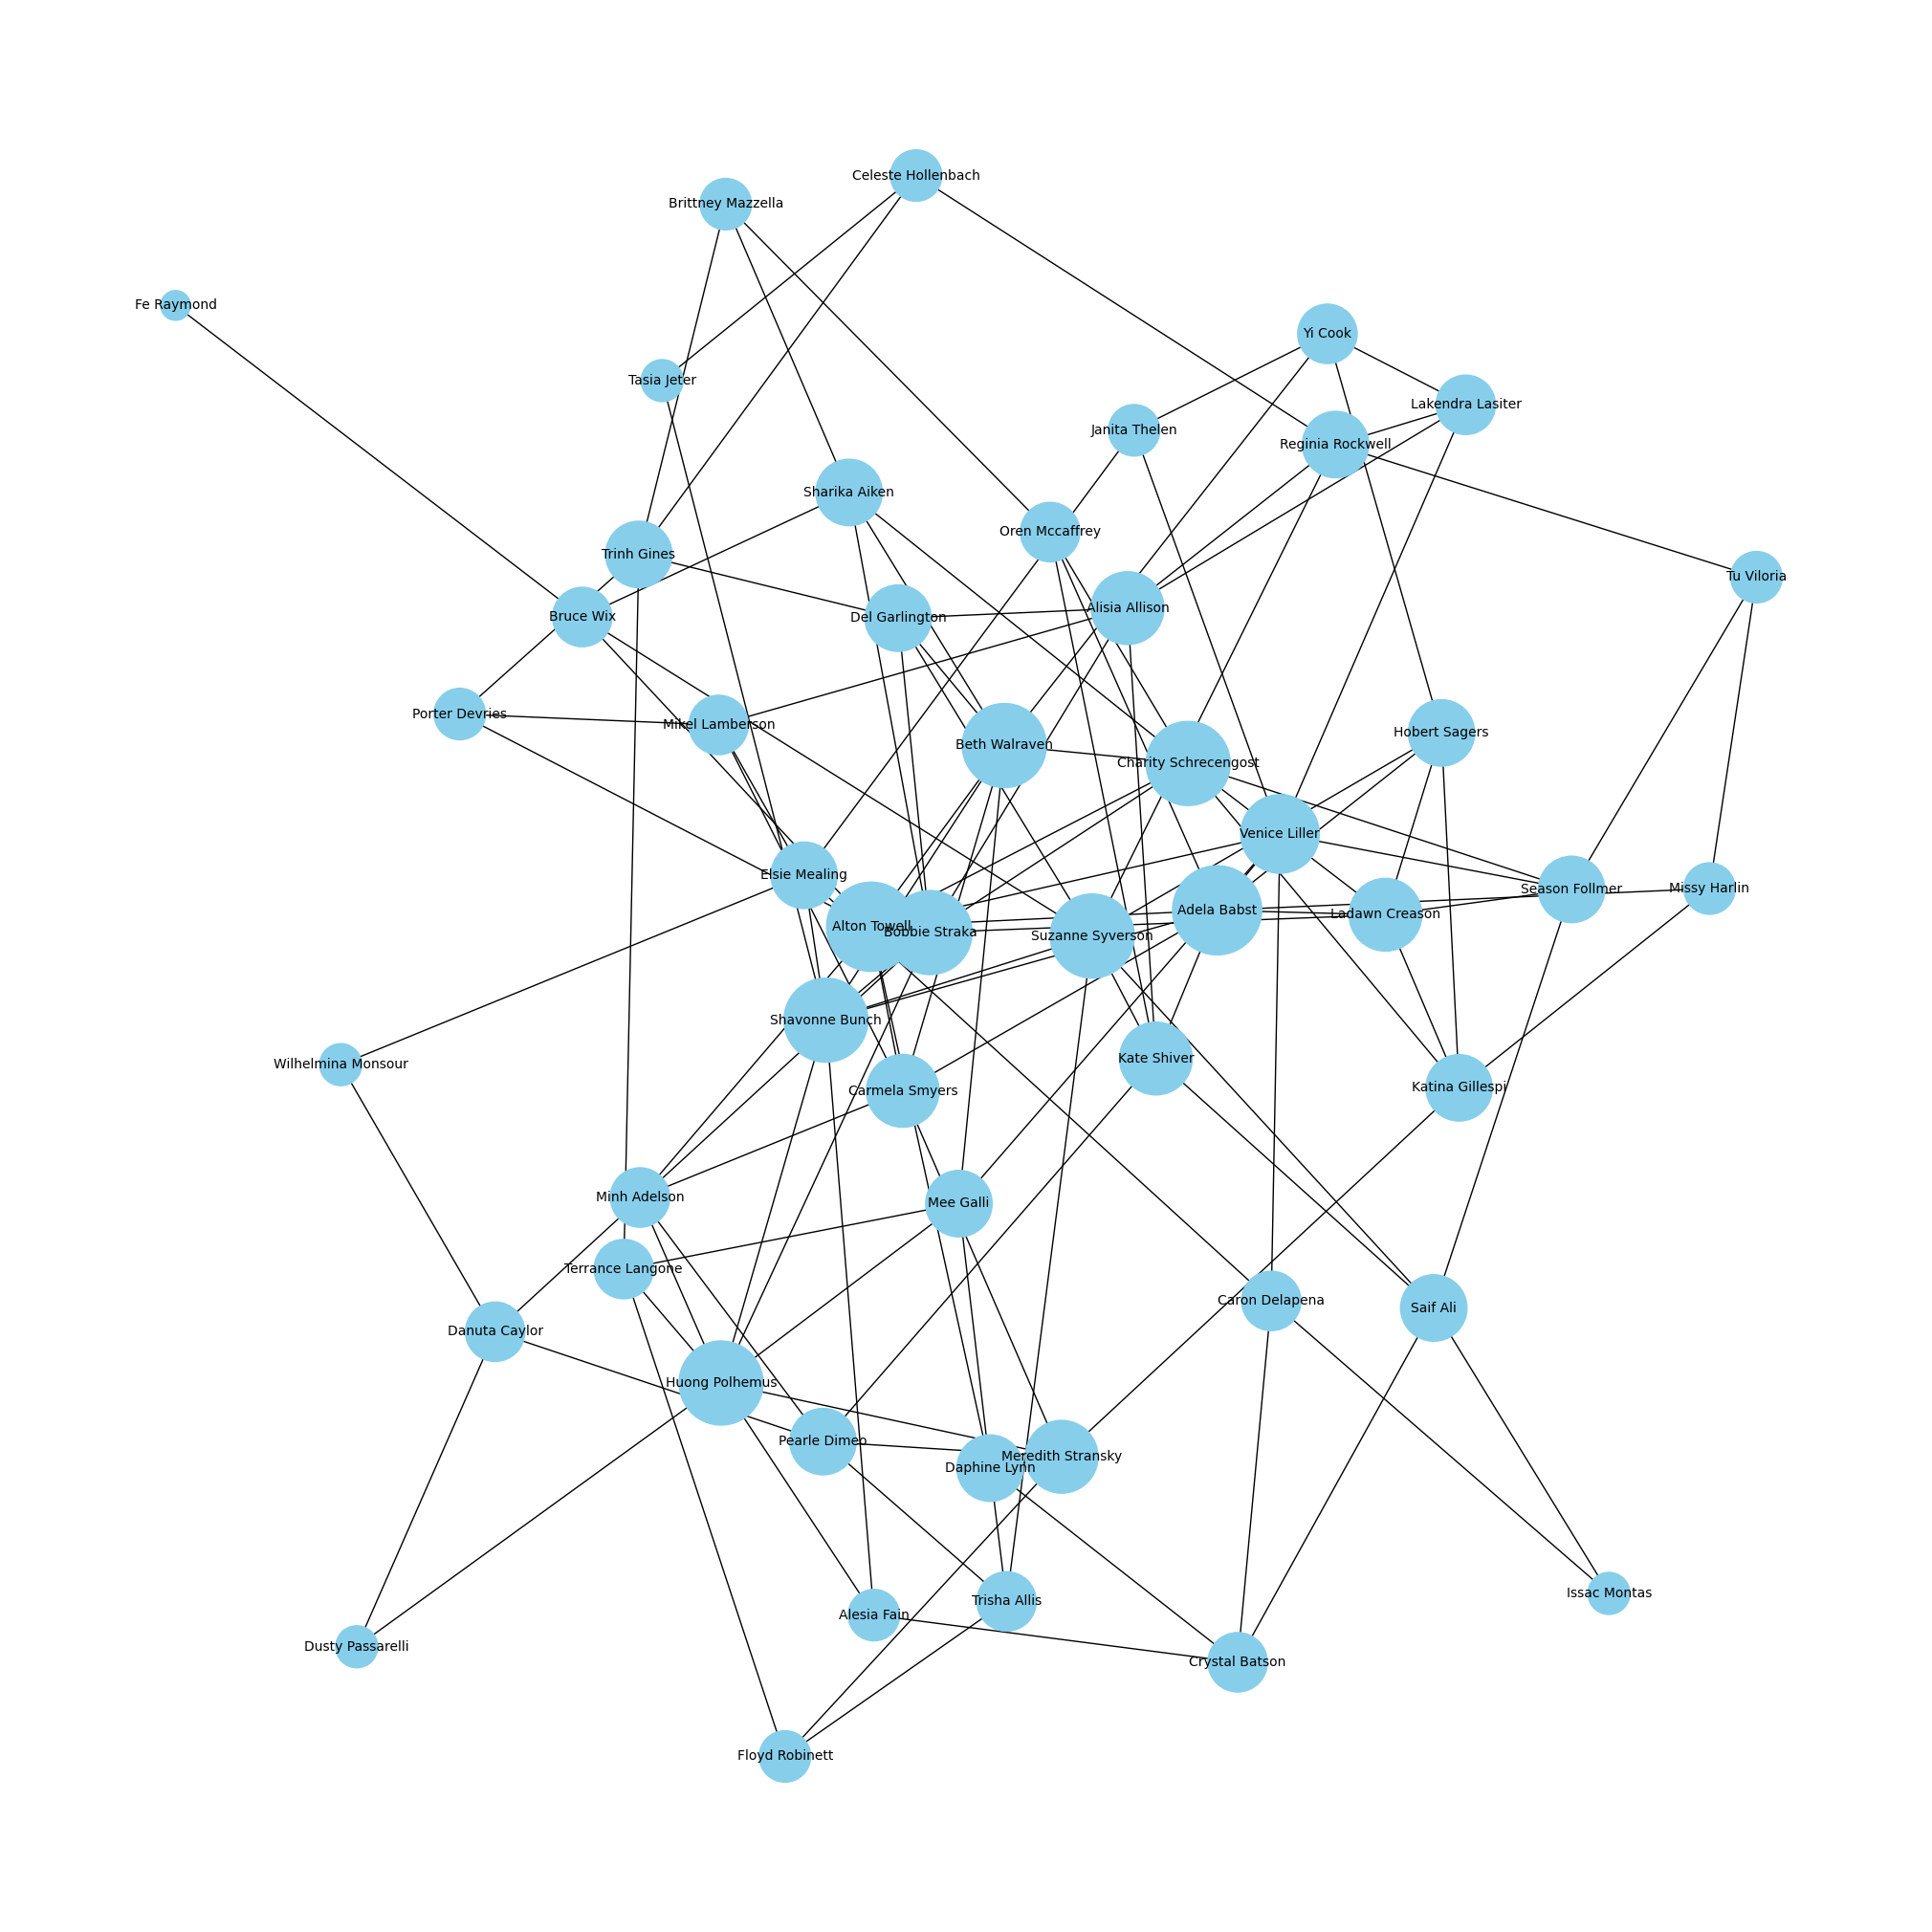

In [18]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G,seed = 50)  # Define the layout for the nodes
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_color='black')
plt.show()

#### NOW LET US DO IT IN THE WHOLE DATASET WHERE WE ANALYZE THE RELATIONSHIP BETWEEN 1000 PERSONS IN THE FACEBOOK DATASET

LOAD THE WHOLE DATA

In [19]:
df_sample = df_cleaned

CREATE THE MAP OF RELATIONSHIPS

In [20]:
map_of_relationships = dict()
df_Names =  df_sample.columns[1:].tolist()
for i in df_Names:
    row_relationships = df_sample[df_sample[i] == 1]["Row Names"].tolist()
    map_of_relationships[i] = list()
    for j in row_relationships:
        map_of_relationships[i].append(j)

### CREATE THE CLUSTERPLOT 

In [22]:
G = nx.Graph()

# add connections 

G.add_nodes_from(df_Names)


# add connections 
for i in df_Names:
    for j in map_of_relationships[i]:
        G.add_edge(i,j)


### KNOW THE PEOPLE WITH HIGHEST DEGREES(RELATIONSHIPS) AND SCALE THEM ACCORDINGLY

In [23]:
degrees = dict(G.degree())

scaling_factor = 100.75

node_sizes = [scaling_factor * degrees[node] for node in G.nodes()]


In [24]:
sorted_degrees = {key: value for key, value in sorted(degrees.items(), key=lambda item: item[1], reverse=True)}


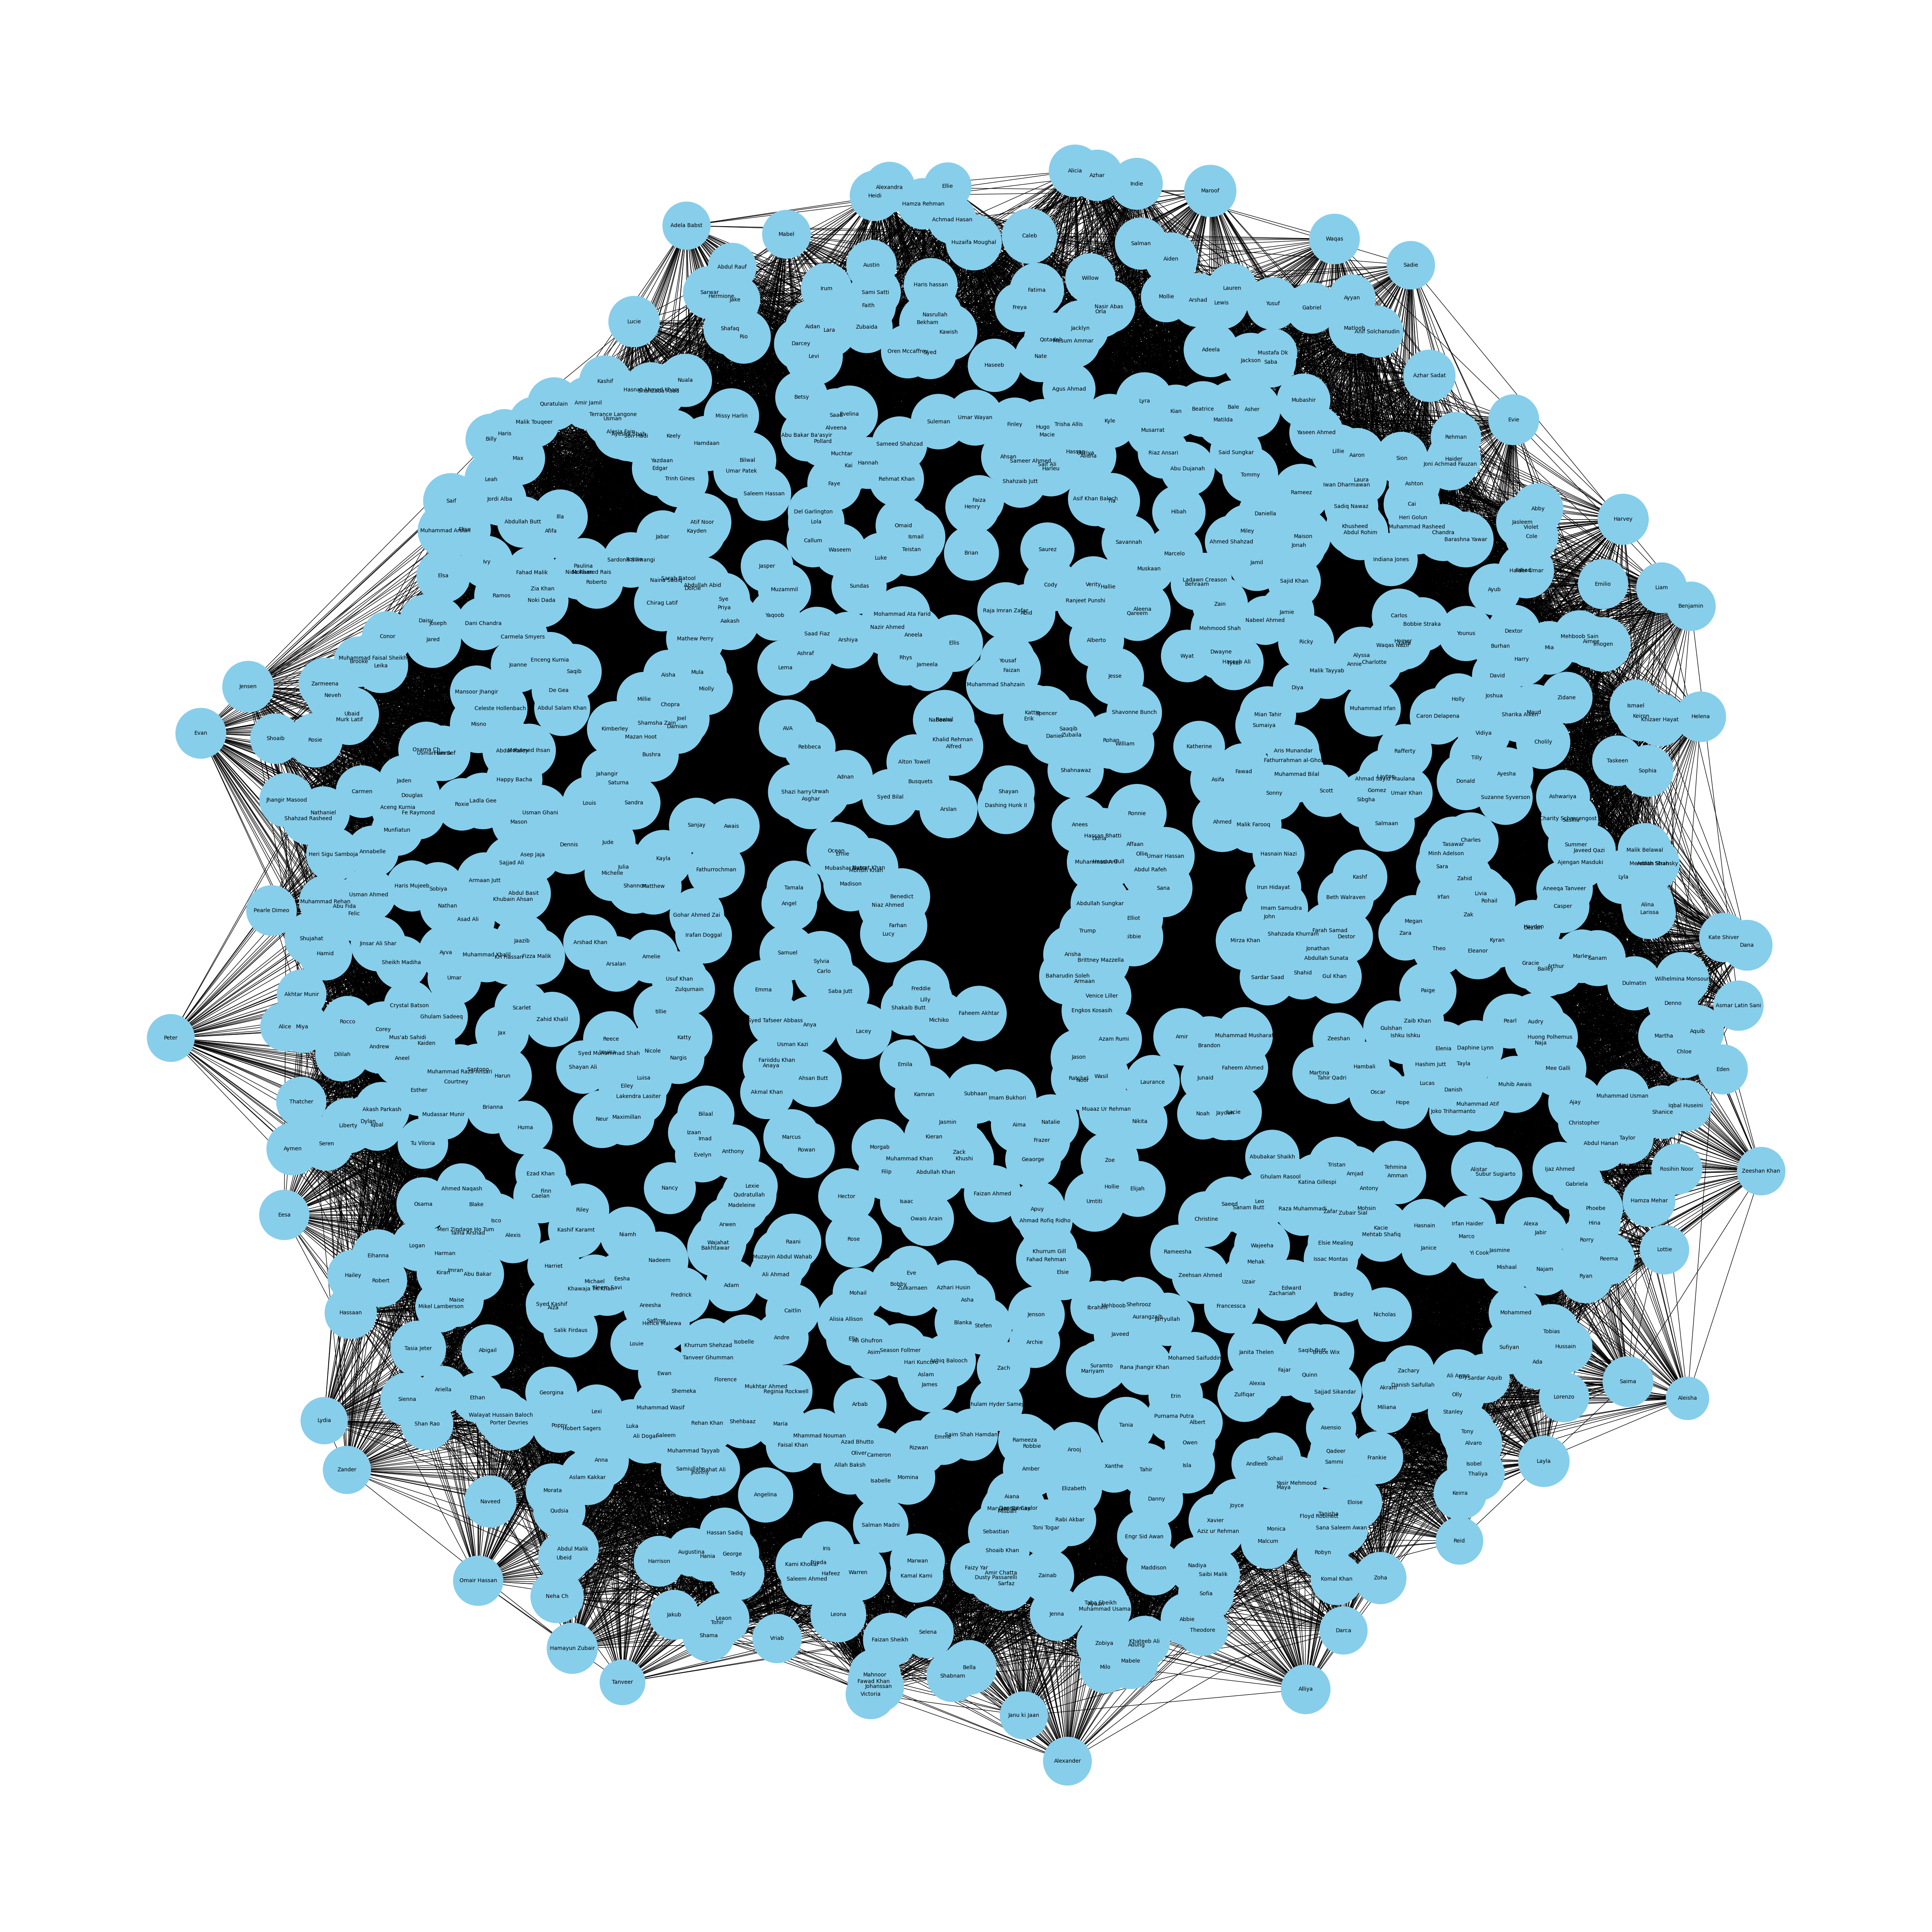

In [25]:
plt.figure(figsize=(50,50))
pos = nx.spring_layout(G)  # Define the layout for the nodes
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_color='black')
plt.show()

In [26]:
sorted_degrees

{'Engkos Kosasih': 127,
 'Ernie': 127,
 'Zack': 126,
 'Fahad Rehman': 126,
 'Sylvia': 125,
 'Umtiti': 125,
 'Asghar': 124,
 'Abdullah Khan': 124,
 'Ahmed': 123,
 'Noor': 123,
 'Carlo': 122,
 'Subhaan': 122,
 'Nusrat Khan': 122,
 'Kieran': 121,
 'Muhammad Shahzain': 121,
 'Emma': 121,
 'Kamran': 121,
 'Khushi': 121,
 'Rawail': 121,
 'Ranjeet Punshi': 121,
 'Mirza Khan': 120,
 'Ronnie': 120,
 'Abdullah Sungkar': 120,
 'Jasmin': 120,
 'Aneela': 120,
 'Abdul Rafey': 120,
 'Venice Liller': 119,
 'Dennis': 119,
 'Niaz Ahmed': 119,
 'Ismail': 119,
 'Muhammad Arif': 119,
 ':ibbie': 119,
 'Arisha': 119,
 'Abdul Rafeh': 118,
 'Imad': 118,
 'Alfred': 118,
 'Marco': 117,
 'Brandon': 117,
 'Umair Hassan': 117,
 'Harun': 117,
 'Rehan Khan': 117,
 'Mehmood Shah': 117,
 'Ocean': 117,
 'Farhan': 117,
 'Allah Baksh': 117,
 'Mula': 117,
 'William': 117,
 'Brittney Mazzella': 116,
 'Saba Jutt': 116,
 'Sana': 116,
 'Faizan': 116,
 'Elliot': 116,
 'Muzayin Abdul Wahab': 116,
 'Atif Noor': 116,
 'AVA': 116,


In [28]:
map_of_relationships['Ernie']

['Suzanne Syverson',
 'Lakendra Lasiter',
 'Alton Towell',
 'Minh Adelson',
 'Alistar',
 'Abubakar Shaikh',
 'Ubeid',
 'Meri Zindage Ho Tum',
 'Aima',
 'Zachariah',
 'Kieran',
 'Saba',
 'Zoha',
 'Kashif Karamt',
 'Saffron',
 'Dextor',
 'Emma',
 'Ahsan Butt',
 'Jesse',
 'Kami Khokar',
 'Shafaq',
 'Douglas',
 'Hanna',
 'Umair Hassan',
 'Saptono',
 'Zainab',
 'Eden',
 'Shazi harry',
 'Jenson',
 'Heidi',
 'Sajjad Sikandar',
 'Dylan',
 'Jonathan',
 'Maud',
 'Emme',
 'Thatcher',
 'Joni Achmad Fauzan',
 'Irfan',
 'Maria',
 'Suleman',
 'Elsa',
 'Jacklyn',
 'Zeeshan',
 'Sheikh Madiha',
 'Mehmood Shah',
 'Joyce',
 'Sufiyan',
 'Nikita',
 'Ellie',
 'Imran',
 'Eesa',
 'Kayden',
 'Mian Tahir',
 'Bailey',
 'Harman',
 'Dwayne',
 'Adam',
 'Muhammad Khan',
 'Osama Ch',
 'Hannah',
 'Hamza Rehman',
 'Audry',
 'Tahir',
 'Fahad Malik',
 'Saad',
 'Ahmad Rofiq Ridho',
 'Jasmin',
 'Son Hadi',
 'Rohan',
 'Wyat',
 'Miliana',
 'Sandra',
 'Pollard',
 'Andleeb',
 'Muhammad Faisal Sheikh',
 'Rameeza',
 'Sion',
 'Has

### BASED ON THE DEGREES AND THE CLUSTERPLOT PROVIDED, WE CAN SAY THAT "Engkos Kosasih" AND "Ernie" WITH 127 DEGREES WHICH MEANS BOTH OF THEM ARE CONNECTED TO 127 PERSONS IN THE FACEBOOK DATASET